In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore')

In [51]:
data_raw = pd.read_csv("../data/kc_house_data.csv")

In [52]:
data = data_raw.copy()
print(data.shape)
data.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


## Data dictionary

In [53]:
# https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/
# https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

### Target

In [54]:
data['price_int'] = data['price'].astype(np.int64)

In [55]:
data.price_int.describe()

count     21613.000
mean     540088.142
std      367127.196
min       75000.000
25%      321950.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price_int, dtype: float64

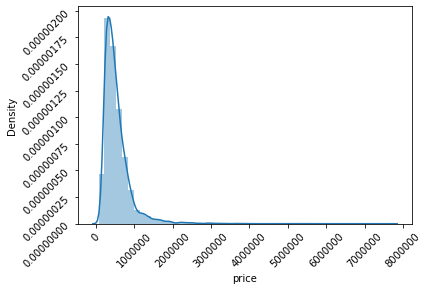

In [56]:
d = sns.distplot(data.price)#,bins=np.arange(12,24))
d.ticklabel_format(useOffset=False,style='plain')
d.tick_params(labelrotation=45)

## Missingness

In [57]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price_int        0
dtype: int64

## Check for duplicate values

In [58]:
data.shape

(21613, 22)

In [59]:
data['id'].nunique()
#177 data points are duplicates

21436

In [60]:
# Inspect duplicates
# It looks like duplicates are repeat housing sales; for now we will keep these but it could present a leakage issue
data.loc[data.duplicated(subset=['id'],keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_int
93,6021501535,20140725T000000,430000.000,3,1.500,1580,5000,1.000,0,0,3,8,1290,290,1939,0,98117,47.687,-122.386,1570,4500,430000
94,6021501535,20141223T000000,700000.000,3,1.500,1580,5000,1.000,0,0,3,8,1290,290,1939,0,98117,47.687,-122.386,1570,4500,700000
313,4139480200,20140618T000000,1384000.000,4,3.250,4290,12103,1.000,0,3,3,11,2690,1600,1997,0,98006,47.550,-122.102,3860,11244,1384000
314,4139480200,20141209T000000,1400000.000,4,3.250,4290,12103,1.000,0,3,3,11,2690,1600,1997,0,98006,47.550,-122.102,3860,11244,1400000
324,7520000520,20140905T000000,232000.000,2,1.000,1240,12092,1.000,0,0,3,6,960,280,1922,1984,98146,47.496,-122.352,1820,7460,232000
325,7520000520,20150311T000000,240500.000,2,1.000,1240,12092,1.000,0,0,3,6,960,280,1922,1984,98146,47.496,-122.352,1820,7460,240500
345,3969300030,20140723T000000,165000.000,4,1.000,1000,7134,1.000,0,0,3,6,1000,0,1943,0,98178,47.490,-122.240,1020,7138,165000
346,3969300030,20141229T000000,239900.000,4,1.000,1000,7134,1.000,0,0,3,6,1000,0,1943,0,98178,47.490,-122.240,1020,7138,239900
371,2231500030,20141001T000000,315000.000,4,2.250,2180,10754,1.000,0,0,5,7,1100,1080,1954,0,98133,47.771,-122.341,1810,6929,315000
372,2231500030,20150324T000000,530000.000,4,2.250,2180,10754,1.000,0,0,5,7,1100,1080,1954,0,98133,47.771,-122.341,1810,6929,530000


## Date

In [61]:
data['date_pd'] = data['date'].apply(lambda x: pd.to_datetime(x[0:8], format='%Y%m%d', errors='ignore'))
data['date_year'] = data['date'].apply(lambda x: x[0:4])
data['date_month'] = data['date'].apply(lambda x: x[4:6])
#data['date_day'] = data['date'].apply(lambda x: x[6:8])

# An exploration into cyclical encoding: https://datascience.stackexchange.com/questions/5990/what-is-a-good-way-to-transform-cyclic-ordinal-attributes
#data['date_month_sin'] = data['date_month'].apply(lambda x: math.sin(2*math.pi*int(x)/12))
#data['date_month_cosin'] = data['date_month'].apply(lambda x: math.cos(2*math.pi*int(x)/12))

In [62]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_int,date_pd,date_year,date_month
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,221900,2014-10-13,2014,10
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,538000,2014-12-09,2014,12
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,180000,2015-02-25,2015,02
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,604000,2014-12-09,2014,12
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,510000,2015-02-18,2015,02


<AxesSubplot:xlabel='date_pd', ylabel='Count'>

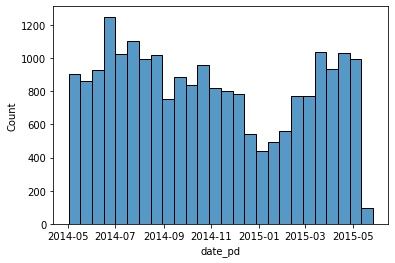

In [63]:
sns.histplot(data.date_pd)

<AxesSubplot:xlabel='date_month', ylabel='price'>

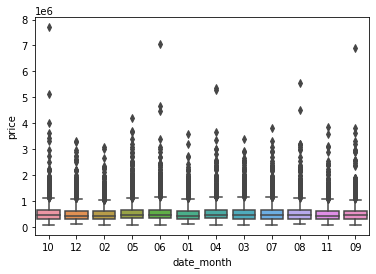

In [64]:
sns.boxplot(data=data, x=data.date_month,y=data.price)

## Feature inspections

In [65]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_int
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456,540088.142
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180,367127.196
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,75000.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,321950.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000,450000.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000


In [66]:
# House with 33 bedrooms
# Discussion on Kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/23473

data.loc[data.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_int,date_pd,date_year,date_month
15870,2402100895,20140625T000000,640000.000,33,1.750,1620,6000,1.000,0,0,5,7,1040,580,1947,0,98103,47.688,-122.331,1330,4700,640000,2014-06-25,2014,06


In [67]:
#Houses with 0 bedrooms

data.loc[data.bedrooms == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_int,date_pd,date_year,date_month
875,6306400140,20140612T000000,1095000.000,0,0.000,3064,4764,3.500,0,2,3,7,3064,0,1990,0,98102,47.636,-122.322,2360,4000,1095000,2014-06-12,2014,06
3119,3918400017,20150205T000000,380000.000,0,0.000,1470,979,3.000,0,2,3,8,1470,0,2006,0,98133,47.715,-122.356,1470,1399,380000,2015-02-05,2015,02
3467,1453602309,20140805T000000,288000.000,0,1.500,1430,1650,3.000,0,0,3,7,1430,0,1999,0,98125,47.722,-122.290,1430,1650,288000,2014-08-05,2014,08
4868,6896300380,20141002T000000,228000.000,0,1.000,390,5900,1.000,0,0,2,4,390,0,1953,0,98118,47.526,-122.261,2170,6000,228000,2014-10-02,2014,10
6994,2954400190,20140624T000000,1295650.000,0,0.000,4810,28008,2.000,0,0,3,12,4810,0,1990,0,98053,47.664,-122.069,4740,35061,1295650,2014-06-24,2014,06
8477,2569500210,20141117T000000,339950.000,0,2.500,2290,8319,2.000,0,0,3,8,2290,0,1985,0,98042,47.347,-122.151,2500,8751,339950,2014-11-17,2014,11
8484,2310060040,20140925T000000,240000.000,0,2.500,1810,5669,2.000,0,0,3,7,1810,0,2003,0,98038,47.349,-122.053,1810,5685,240000,2014-09-25,2014,09
9773,3374500520,20150429T000000,355000.000,0,0.000,2460,8049,2.000,0,0,3,8,2460,0,1990,0,98031,47.410,-122.168,2520,8050,355000,2015-04-29,2015,04
9854,7849202190,20141223T000000,235000.000,0,0.000,1470,4800,2.000,0,0,3,7,1470,0,1996,0,98065,47.526,-121.828,1060,7200,235000,2014-12-23,2014,12
12653,7849202299,20150218T000000,320000.000,0,2.500,1490,7111,2.000,0,0,3,7,1490,0,1999,0,98065,47.526,-121.826,1500,4675,320000,2015-02-18,2015,02


In [68]:
#Houses with 0 bathrooms

data.loc[data.bathrooms == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_int,date_pd,date_year,date_month
875,6306400140,20140612T000000,1095000.000,0,0.000,3064,4764,3.500,0,2,3,7,3064,0,1990,0,98102,47.636,-122.322,2360,4000,1095000,2014-06-12,2014,06
1149,3421079032,20150217T000000,75000.000,1,0.000,670,43377,1.000,0,0,3,3,670,0,1966,0,98022,47.264,-121.906,1160,42882,75000,2015-02-17,2015,02
3119,3918400017,20150205T000000,380000.000,0,0.000,1470,979,3.000,0,2,3,8,1470,0,2006,0,98133,47.715,-122.356,1470,1399,380000,2015-02-05,2015,02
5832,5702500050,20141104T000000,280000.000,1,0.000,600,24501,1.000,0,0,2,3,600,0,1950,0,98045,47.532,-121.749,990,22549,280000,2014-11-04,2014,11
6994,2954400190,20140624T000000,1295650.000,0,0.000,4810,28008,2.000,0,0,3,12,4810,0,1990,0,98053,47.664,-122.069,4740,35061,1295650,2014-06-24,2014,06
9773,3374500520,20150429T000000,355000.000,0,0.000,2460,8049,2.000,0,0,3,8,2460,0,1990,0,98031,47.410,-122.168,2520,8050,355000,2015-04-29,2015,04
9854,7849202190,20141223T000000,235000.000,0,0.000,1470,4800,2.000,0,0,3,7,1470,0,1996,0,98065,47.526,-121.828,1060,7200,235000,2014-12-23,2014,12
10481,203100435,20140918T000000,484000.000,1,0.000,690,23244,1.000,0,0,4,7,690,0,1948,0,98053,47.643,-121.955,1690,19290,484000,2014-09-18,2014,09
14423,9543000205,20150413T000000,139950.000,0,0.000,844,4269,1.000,0,0,4,7,844,0,1913,0,98001,47.278,-122.250,1380,9600,139950,2015-04-13,2015,04
19452,3980300371,20140926T000000,142000.000,0,0.000,290,20875,1.000,0,0,1,1,290,0,1963,0,98024,47.531,-121.888,1620,22850,142000,2014-09-26,2014,09


In [69]:
data.loc[data.bedrooms > 5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_int,date_pd,date_year,date_month
209,6300000550,20140717T000000,464000.000,6,3.000,2300,3404,2.000,0,0,3,7,1600,700,1920,1994,98133,47.707,-122.343,1560,1312,464000,2014-07-17,2014,07
232,9264902050,20141121T000000,315000.000,6,2.750,2940,7350,1.000,0,0,3,8,1780,1160,1978,0,98023,47.310,-122.339,2120,8236,315000,2014-11-21,2014,11
239,5152100060,20140529T000000,472000.000,6,2.500,4410,14034,1.000,0,2,4,9,2350,2060,1965,0,98003,47.338,-122.324,2600,13988,472000,2014-05-29,2014,05
331,2946001550,20150416T000000,279000.000,6,1.750,2240,11180,2.000,0,0,4,7,2240,0,1955,0,98198,47.420,-122.323,1590,7955,279000,2015-04-16,2015,04
486,9286000240,20140711T000000,1067000.000,6,3.500,4860,11793,2.000,0,0,3,11,3860,1000,1998,0,98006,47.552,-122.137,3600,11793,1067000,2014-07-11,2014,07
527,3225079035,20140618T000000,1600000.000,6,5.000,6050,230652,2.000,0,3,3,11,6050,0,2001,0,98024,47.603,-121.943,4210,233971,1600000,2014-06-18,2014,06
556,5486800070,20140620T000000,1950000.000,7,3.500,4640,15235,2.000,0,1,3,11,2860,1780,1965,2003,98040,47.567,-122.231,3230,20697,1950000,2014-06-20,2014,06
558,4376700570,20150427T000000,750000.000,6,1.750,2750,9563,2.000,0,0,4,8,2750,0,1973,0,98052,47.637,-122.097,2040,9563,750000,2015-04-27,2015,04
717,8820903380,20140728T000000,452000.000,6,2.250,2660,13579,2.000,0,0,3,7,2660,0,1937,1990,98125,47.714,-122.286,1120,8242,452000,2014-07-28,2014,07
718,8820903380,20150102T000000,730000.000,6,2.250,2660,13579,2.000,0,0,3,7,2660,0,1937,1990,98125,47.714,-122.286,1120,8242,730000,2015-01-02,2015,01


<AxesSubplot:xlabel='sqft_living', ylabel='bedrooms'>

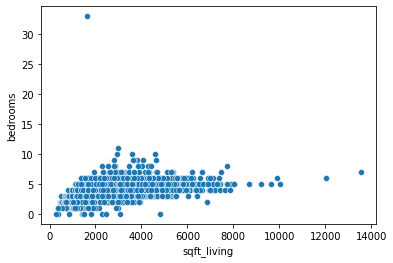

In [70]:
# Logical check for bedrooms vs sqft

sns.scatterplot(y=data.bedrooms,x=data.sqft_living)

<AxesSubplot:ylabel='Density'>

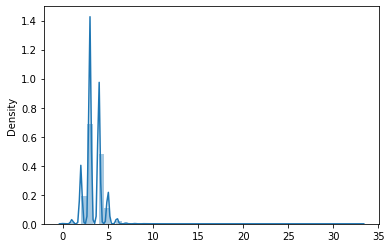

In [71]:
sns.distplot(x=data.bedrooms)

<AxesSubplot:ylabel='Density'>

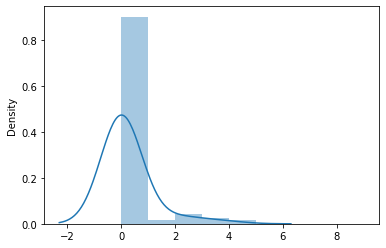

In [72]:
sns.distplot(x=data.view, bins=np.arange(0,10), kde_kws={'bw':1})

<AxesSubplot:ylabel='Density'>

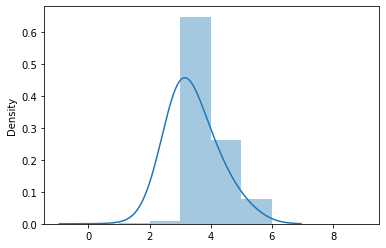

In [73]:
sns.distplot(x=data.condition, bins=np.arange(0,10), kde_kws={'bw':1})

<AxesSubplot:ylabel='Density'>

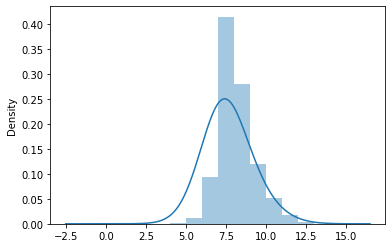

In [74]:
# King County assessor's defintion of grade: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

sns.distplot(x=data.grade, bins=np.arange(0,15), kde_kws={'bw':1})

In [75]:
# Logical check for sqft_above + sqft_basement = sqft_living

data[(data['sqft_above'] + data['sqft_basement'])!=data['sqft_living']]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_int,date_pd,date_year,date_month


<AxesSubplot:ylabel='Density'>

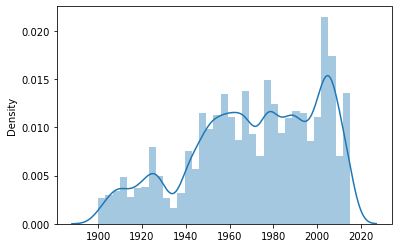

In [76]:
sns.distplot(x=data.yr_built)

In [77]:
# Entries where the year built is after the sale date
data[data['yr_built'].astype(int) > data['date_year'].astype(int)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_int,date_pd,date_year,date_month
1763,1832100030,20140625T000000,597326.000,4,4.000,3570,8250,2.000,0,0,3,10,2860,710,2015,0,98040,47.578,-122.226,2230,10000,597326,2014-06-25,2014,06
2687,3076500830,20141029T000000,385195.000,1,1.000,710,6000,1.500,0,0,3,6,710,0,2015,0,98144,47.576,-122.316,1440,4800,385195,2014-10-29,2014,10
7526,9520900210,20141231T000000,614285.000,5,2.750,2730,6401,2.000,0,0,3,8,2730,0,2015,0,98072,47.769,-122.160,2520,6126,614285,2014-12-31,2014,12
8039,1250200495,20140624T000000,455000.000,2,1.500,1200,1259,2.000,0,0,3,8,1000,200,2015,0,98144,47.600,-122.298,1320,1852,455000,2014-06-24,2014,06
14489,2770601530,20140826T000000,500000.000,2,2.250,1570,1269,2.000,0,0,3,9,1280,290,2015,0,98199,47.651,-122.385,1570,6000,500000,2014-08-26,2014,08
17098,9126100346,20140617T000000,350000.000,3,2.000,1380,3600,3.000,0,0,3,8,1380,0,2015,0,98122,47.607,-122.305,1480,3600,350000,2014-06-17,2014,06
19805,9126100765,20140801T000000,455000.000,3,1.750,1320,1014,3.000,0,0,3,9,1320,0,2015,0,98122,47.605,-122.305,1380,1495,455000,2014-08-01,2014,08
20770,9310300160,20140828T000000,357000.000,5,2.500,2990,9240,2.000,0,0,3,8,2990,0,2015,0,98133,47.738,-122.348,1970,18110,357000,2014-08-28,2014,08
20852,1257201420,20140709T000000,595000.000,4,3.250,3730,4560,2.000,0,0,3,9,2760,970,2015,0,98103,47.672,-122.330,1800,4560,595000,2014-07-09,2014,07
20963,6058600220,20140731T000000,230000.000,3,1.500,1040,1264,2.000,0,0,3,9,900,140,2015,0,98144,47.595,-122.301,1350,3000,230000,2014-07-31,2014,07


<AxesSubplot:ylabel='Density'>

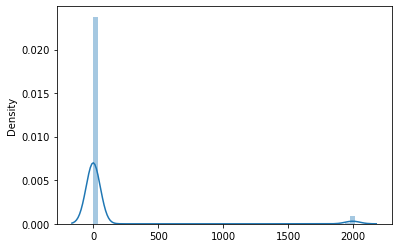

In [78]:
sns.distplot(x=data.yr_renovated)

In [79]:
# Entries where the year built is after the sale date
data[data['yr_renovated'].astype(int) > data['date_year'].astype(int)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_int,date_pd,date_year,date_month
2295,8712100320,20140728T000000,585000.000,5,2.750,2350,4178,1.500,0,0,3,8,1520,830,1922,2015,98112,47.639,-122.300,1920,4178,585000,2014-07-28,2014,07
7097,9141100005,20141028T000000,285000.000,4,3.500,2770,10505,2.000,0,0,3,8,2770,0,1940,2015,98133,47.741,-122.355,1760,10505,285000,2014-10-28,2014,10
11599,7284900030,20140522T000000,850000.000,4,3.250,3090,6744,2.000,0,4,3,9,3090,0,1923,2015,98177,47.768,-122.388,2020,6656,850000,2014-05-22,2014,05
14859,3585900665,20140606T000000,805000.000,5,2.500,4600,19831,1.000,0,3,3,9,2300,2300,1956,2015,98177,47.761,-122.378,2890,19831,805000,2014-06-06,2014,06
15687,3585900190,20141006T000000,825000.000,3,2.500,3400,38400,1.000,0,4,3,8,1870,1530,1955,2015,98177,47.761,-122.372,3400,24338,825000,2014-10-06,2014,10
18575,8935100100,20140701T000000,476000.000,4,3.000,2890,6885,1.000,0,0,3,7,1590,1300,1945,2015,98115,47.676,-122.282,2180,6885,476000,2014-07-01,2014,07


<AxesSubplot:>

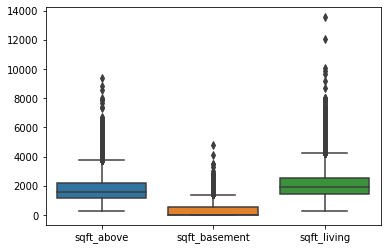

In [80]:
sns.boxplot(data=data.filter(items=['sqft_above','sqft_basement','sqft_living']))

In [81]:
# There may be a long / lat issue: https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/197779

## Transformation

### Dropping data

In [82]:
# It's reasonable to conclude these are data entry errors

data = data.drop(data[data.bedrooms == 33].index)
data = data.drop(data[data.bedrooms == 0].index)
data = data.drop(data[data.bathrooms == 0].index)

### Constructing the X matrix

In [83]:
X = pd.DataFrame()

# Continous variables
X['sqft_basement'] = data['sqft_basement']
X['sqft_above'] = data['sqft_above']
X['sqft_living'] = data['sqft_living']
X['sqft_lot'] = data['sqft_lot']
X['sqft_living15'] = data['sqft_living15']
X['sqft_lot15'] = data['sqft_lot15']

# Ordinal variables
X['bedrooms'] = data['bedrooms']
X['bathrooms'] = data['bathrooms']
X['floors'] = data['floors']
X['view'] = data['view']
X['grade'] = data['grade']
X['condition'] = data['condition']

# Datetime variables
X['age'] = data.apply(lambda x: int(x['date_year']) - int(x['yr_built']),axis=1)
X['age_renovated'] = data.apply(lambda x: 9999 if x['yr_renovated']==0 else (int(x['date_year']) - int(x['yr_renovated'])),axis=1)

# Binary variables
X['waterfront'] = data['waterfront']
X['renovated'] = data['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

# One-hot encoded variables
sale_month_one_hot = pd.get_dummies(data['date_month'],drop_first=True)
X = pd.merge(X,sale_month_one_hot.add_prefix('sale_month_'), how='left',left_index=True, right_index=True)

In [84]:
X.describe()

,sqft_basement,sqft_above,sqft_living,sqft_lot,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,view,grade,condition,age,age_renovated,waterfront,renovated,sale_month_02,sale_month_03,sale_month_04,sale_month_05,sale_month_06,sale_month_07,sale_month_08,sale_month_09,sale_month_10,sale_month_11,sale_month_12
count,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000
mean,291.712,1788.632,2080.343,15099.830,1986.651,12758.657,3.372,2.116,1.494,0.234,7.658,3.410,43.322,9576.596,0.008,0.042,0.058,0.087,0.103,0.112,0.101,0.102,0.090,0.082,0.087,0.065,0.068
std,442.674,827.763,918.122,41413.549,685.232,27275.018,0.904,0.769,0.540,0.766,1.173,0.650,29.378,2009.377,0.087,0.201,0.233,0.282,0.304,0.315,0.301,0.303,0.286,0.274,0.282,0.247,0.252
min,0.000,370.000,370.000,520.000,399.000,651.000,1.000,0.500,1.000,0.000,3.000,1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,1190.000,1430.000,5040.000,1490.000,5100.000,3.000,1.750,1.000,0.000,7.000,3.000,18.000,9999.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,1560.000,1910.000,7619.000,1840.000,7620.000,3.000,2.250,1.500,0.000,7.000,3.000,40.000,9999.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,560.000,2210.000,2550.000,10685.500,2360.000,10083.000,4.000,2.500,2.000,0.000,8.000,4.000,63.000,9999.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,4820.000,9410.000,13540.000,1651359.000,6210.000,871200.000,11.000,8.000,3.500,4.000,13.000,5.000,115.000,9999.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


<AxesSubplot:xlabel='age', ylabel='Density'>

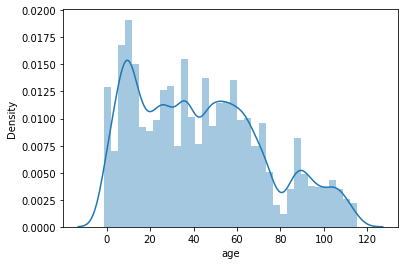

In [85]:
sns.distplot(X.age)

<AxesSubplot:xlabel='age_renovated', ylabel='Density'>

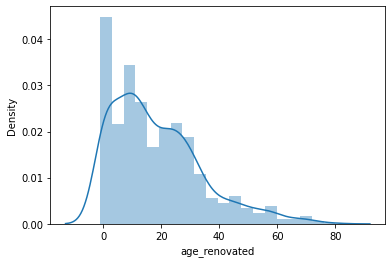

In [86]:
sns.distplot(X[X['age_renovated']<9999].age_renovated)

In [87]:
print(X.shape)
X.head()

(21596, 27)


,sqft_basement,sqft_above,sqft_living,sqft_lot,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,view,grade,condition,age,age_renovated,waterfront,renovated,sale_month_02,sale_month_03,sale_month_04,sale_month_05,sale_month_06,sale_month_07,sale_month_08,sale_month_09,sale_month_10,sale_month_11,sale_month_12
0,0,1180,1180,5650,1340,5650,3,1.000,1.000,0,7,3,59,9999,0,0,0,0,0,0,0,0,0,0,1,0,0
1,400,2170,2570,7242,1690,7639,3,2.250,2.000,0,7,3,63,23,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,770,770,10000,2720,8062,2,1.000,1.000,0,6,3,82,9999,0,0,1,0,0,0,0,0,0,0,0,0,0
3,910,1050,1960,5000,1360,5000,4,3.000,1.000,0,7,5,49,9999,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1680,1680,8080,1800,7503,3,2.000,1.000,0,8,3,28,9999,0,0,1,0,0,0,0,0,0,0,0,0,0


In [88]:
# Code target as top 25%
y = data["price_int"].apply(lambda x: 1 if x >= 645000  else 0 )
print(y.shape)
print(y.value_counts())

(21596,)
0    16185
1     5411
Name: price_int, dtype: int64


In [89]:
y_reg = data['price_int']
print(y_reg.shape)

(21596,)


In [90]:
# Target / metric discussion: https://gitlab.com/ccao-data-science---modeling/models/ccao_res_avm#how-it-works

## Correlations

<AxesSubplot:>

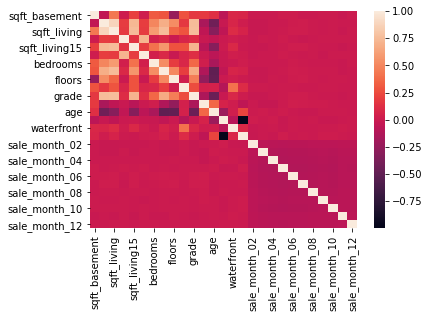

In [91]:
# Feature correlation
corr = X.corr()
# Heatmap
sns.heatmap(corr)

### Reset indices before saving

In [92]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [93]:
X.shape

(21596, 27)

In [94]:
y.shape

(21596,)

In [95]:
# Save the csvs
X.to_csv("../matrices/housing_prices/X.csv")
y.to_csv("../matrices/housing_prices/y.csv")
y.to_csv("../matrices/housing_prices/y_reg.csv")